# Lecture 11: Data analysis with ```pandas```

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In the Lecture 5, you have already looked into ```csv.reader``` which converts data from CSV files into python strings. Working with this type of data is not always convenient. 

### Pandas
 - library for data manipulation and analysis
 - imports data from CSV, JSON, SQL, Excel etc.
 - built on top of ```numpy```
 - most machine learning tools support ```pandas``` $\rightarrow$ used for data preprocessing in machine learning
 - two classes for handling data: `Series` (1d labelled array) and `DataFrame` (2d table)

You can find the pandas documentation here: https://pandas.pydata.org/docs/index.html, including the nice intro 10 minutes to pandas: https://pandas.pydata.org/docs/user_guide/10min.html#min

## Reading the data file

### Isotope database

As an example, we will work with ```isotope_data.csv``` that was generated from https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html

This database contains information on physical properties of most of the known isotopes (but not all!)

In [2]:
df = pd.read_csv("isotope_data.csv")

If you already know the content of the file and you don't need all the columns, you can read the file more efficiently with 

```usecols = ['column1', 'column2', 'column3']```

In [3]:
df

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
0,0,1,n,-0.1149,0.0027,NaN,NaN,NaN,0.0,NaN,...,0.0000,1.008665e+06,0.00047,8071.31806,0.00044,N,NaN,31-Oct-2005,BALRAJ SINGH,2024-01-14
1,0,4,n,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Aug-2017,J.E. Purcell and C.G. Sheu,2024-01-14
2,1,2,H,1.7591,0.0363,NaN,NaN,NaN,0.0,NaN,...,0.0003,3.016049e+06,0.00008,14949.81090,0.00008,N,1934.0,30-Jun-2015,J.E. Purcell{+#} and C.G. Sheu{+*},2024-01-14
3,1,3,H,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,25.0000,4.026432e+06,107.35400,24621.12900,100.00000,N,1981.0,8-OCT-1991,J. H. KELLEY and D. R. TILLEY and H.R. WELLE...,2024-01-14
4,1,4,H,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,17.8885,5.035311e+06,96.02000,32892.44700,89.44300,N,1987.0,28-Feb-2019,J.E. Purcell and C.G. Sheu,2024-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,116,176,Lv,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,3.0000,2.922020e+08,819.00000,188133.00000,763.00000,Y,2004.0,31-Jan-2019,BALRAJ SINGH,2024-01-14
3225,116,177,Lv,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2.0000,2.932046e+08,553.00000,190568.00000,515.00000,Y,2004.0,14-Sep-2021,C. Morse,2024-01-14
3226,117,176,Ts,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,3.0000,2.932087e+08,835.00000,194428.00000,778.00000,Y,2010.0,14-Sep-2021,C. Morse,2024-01-14
3227,117,177,Ts,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2.0000,2.942108e+08,637.00000,196397.00000,593.00000,Y,2010.0,31-Jan-2019,BALRAJ SINGH,2024-01-14


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df['Z']

0         0
1         0
2         1
3         1
4         1
       ... 
3224    116
3225    116
3226    117
3227    117
3228    118
Name: Z, Length: 3229, dtype: int64

In [6]:
type(df['Z'])

pandas.core.series.Series

### What is inside?

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Z                             3229 non-null   int64  
 1   N                             3229 non-null   int64  
 2   symbol                        3229 non-null   object 
 3   radius [fm]                   906 non-null    float64
 4    unc                          906 non-null    float64
 5    abundance [mole fract.]      285 non-null    float64
 6    unc.1                        264 non-null    float64
 7    energy shift                 45 non-null     object 
 8    energy [keV}                 3219 non-null   float64
 9    unc.2                        1 non-null      float64
 10                                29 non-null     float64
 11   jp                           2765 non-null   object 
 12  half_life                     3204 non-null   object 
 13   ha

In [8]:
df.describe()

,Z,N,radius [fm],unc,abundance [mole fract.],unc.1,energy [keV},unc.2,,half_life [s],...,unc.3,Sp [keV],unc.4,Binding/A,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,discovery
count,3229.000000,3229.000000,906.000000,906.000000,285.000000,264.000000,3219.0,1.0,29.000000,2.963000e+03,...,3161.000000,3153.000000,3153.00000,3224.000000,3224.000000,3.224000e+03,3224.000000,3224.000000,3224.000000,3197.000000
mean,57.360793,81.121400,4.725548,0.016979,29.122745,0.158084,0.0,25.0,72.068966,8.269819e+28,...,127.816173,7118.630970,130.87132,7998.744166,1.059212,1.384834e+08,97.541527,-27929.832576,90.869209,1969.038474
std,27.137670,42.035929,0.799455,0.038849,33.570669,0.581713,0.0,NaN,179.570506,4.464067e+30,...,216.671134,5392.775989,215.31627,662.997362,3.791803,6.866364e+07,169.132647,53275.382831,157.567627,25.296256
min,0.000000,1.000000,-0.114900,0.001000,0.004000,0.000100,0.0,25.0,0.000000,8.608259e-23,...,0.000000,-4900.000000,0.00010,0.000000,0.000000,1.008665e+06,0.000000,-91652.843000,0.000000,1851.000000
25%,36.000000,48.000000,4.308575,0.003000,4.040000,0.016750,0.0,25.0,0.000000,1.665000e-01,...,4.091800,3014.355200,4.99120,7765.526350,0.019700,8.491497e+07,2.500000,-66611.679250,2.329000,1950.000000
50%,58.000000,81.000000,4.883300,0.005050,14.910000,0.040500,0.0,25.0,0.000000,1.220000e+01,...,18.248600,6101.512600,18.75660,8101.434750,0.072050,1.379522e+08,11.394500,-42225.000000,10.614500,1970.000000
75%,79.000000,112.000000,5.381425,0.015875,37.300000,0.120000,0.0,25.0,40.000000,1.338000e+03,...,150.564000,10276.715600,171.00000,8388.974950,1.000000,1.899703e+08,103.030250,-3342.656750,95.972500,1988.000000
max,118.000000,177.000000,5.904800,0.313900,100.000000,7.000000,0.0,25.0,850.000000,2.429883e+32,...,2011.000000,32060.654900,1090.00000,8794.555500,143.000000,2.942140e+08,1078.000000,199320.000000,1004.000000,2020.000000


In [9]:
df.head()

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
0,0,1,n,-0.1149,0.0027,NaN,NaN,NaN,0.0,NaN,...,0.0000,1.008665e+06,0.00047,8071.31806,0.00044,N,NaN,31-Oct-2005,BALRAJ SINGH,2024-01-14
1,0,4,n,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Aug-2017,J.E. Purcell and C.G. Sheu,2024-01-14
2,1,2,H,1.7591,0.0363,NaN,NaN,NaN,0.0,NaN,...,0.0003,3.016049e+06,0.00008,14949.81090,0.00008,N,1934.0,30-Jun-2015,J.E. Purcell{+#} and C.G. Sheu{+*},2024-01-14
3,1,3,H,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,25.0000,4.026432e+06,107.35400,24621.12900,100.00000,N,1981.0,8-OCT-1991,J. H. KELLEY and D. R. TILLEY and H.R. WELLE...,2024-01-14
4,1,4,H,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,17.8885,5.035311e+06,96.02000,32892.44700,89.44300,N,1987.0,28-Feb-2019,J.E. Purcell and C.G. Sheu,2024-01-14


We can also specify how many rows we want to see with head() (and tail()).

In [10]:
df.head(3)

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
0,0,1,n,-0.1149,0.0027,NaN,NaN,NaN,0.0,NaN,...,0.0000,1.008665e+06,0.00047,8071.31806,0.00044,N,NaN,31-Oct-2005,BALRAJ SINGH,2024-01-14
1,0,4,n,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Aug-2017,J.E. Purcell and C.G. Sheu,2024-01-14
2,1,2,H,1.7591,0.0363,NaN,NaN,NaN,0.0,NaN,...,0.0003,3.016049e+06,0.00008,14949.81090,0.00008,N,1934.0,30-Jun-2015,J.E. Purcell{+#} and C.G. Sheu{+*},2024-01-14


In [11]:
df.tail()

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
3224,116,176,Lv,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,3.0,292201969.0,819.0,188133.0,763.0,Y,2004.0,31-Jan-2019,BALRAJ SINGH,2024-01-14
3225,116,177,Lv,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2.0,293204583.0,553.0,190568.0,515.0,Y,2004.0,14-Sep-2021,C. Morse,2024-01-14
3226,117,176,Ts,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,3.0,293208727.0,835.0,194428.0,778.0,Y,2010.0,14-Sep-2021,C. Morse,2024-01-14
3227,117,177,Ts,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2.0,294210840.0,637.0,196397.0,593.0,Y,2010.0,31-Jan-2019,BALRAJ SINGH,2024-01-14
3228,118,176,Og,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2.0,294213979.0,594.0,199320.0,553.0,Y,2004.0,31-Jan-2019,BALRAJ SINGH,2024-01-14


In [12]:
df.shape

(3229, 55)

In [13]:
df.columns

Index(['Z', 'N', 'symbol', 'radius [fm]', ' unc', ' abundance [mole fract.]',
       ' unc.1', ' energy shift', ' energy [keV}', ' unc.2', '  ', ' jp',
       'half_life', ' half-life operator', 'unc', 'unit', ' half_life [s]',
       ' unc.3', ' decay', ' decay %', ' unc.4', ' decay.1', ' decay %.1',
       ' unc.5', ' decay.2', ' decay %.2', ' unc.6', 'isospin',
       'magnetic dipole [mu N]', ' unc.7', ' electric quadrupole [b] ',
       ' unc.8', 'Qb- [keV]', 'unc.1', 'Qb- n [keV]', 'unc.2', 'Qa [keV]',
       ' unc.9', ' Qec [keV]', ' unc.10', 'Sn [keV]', 'unc.3', ' Sp [keV]',
       'unc.4', 'Binding/A', 'unc.5', 'atomic mass [AMU * 1.E-3 ]', ' unc.11',
       ' mass excess [keV]', 'unc.6', 'mass excess from systematics',
       ' discovery', ' ENSDF publication cut-off', ' ENSDF authors',
       'Extraction_date'],
      dtype='object')

## Selecting data from the table

### Selecting columns

In [14]:
df[["Z","N"]]

,Z,N
0,0,1
1,0,4
2,1,2
3,1,3
4,1,4
...,...,...
3224,116,176
3225,116,177
3226,117,176
3227,117,177


In [15]:
df.iloc[:, 1]

0         1
1         4
2         2
3         3
4         4
       ... 
3224    176
3225    177
3226    176
3227    177
3228    176
Name: N, Length: 3229, dtype: int64

In [16]:
df.loc[:, "N"]

0         1
1         4
2         2
3         3
4         4
       ... 
3224    176
3225    177
3226    176
3227    177
3228    176
Name: N, Length: 3229, dtype: int64

### Selecting rows

In [21]:
df.loc[2:3]

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
2,1,2,H,1.7591,0.0363,NaN,NaN,NaN,0.0,NaN,...,0.0003,3.016049e+06,0.00008,14949.8109,0.00008,N,1934.0,30-Jun-2015,J.E. Purcell{+#} and C.G. Sheu{+*},2024-01-14
3,1,3,H,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,25.0000,4.026432e+06,107.35400,24621.1290,100.00000,N,1981.0,8-OCT-1991,J. H. KELLEY and D. R. TILLEY and H.R. WELLE...,2024-01-14


In [22]:
df.iloc[2:3]

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
2,1,2,H,1.7591,0.0363,NaN,NaN,NaN,0.0,NaN,...,0.0003,3.016049e+06,0.00008,14949.8109,0.00008,N,1934.0,30-Jun-2015,J.E. Purcell{+#} and C.G. Sheu{+*},2024-01-14


### Selecting a range from the table

In [23]:
df.loc[2:5, ["Z","N","symbol" ,"radius [fm]","half_life"]]

,Z,N,symbol,radius [fm],half_life
2,1,2,H,1.7591,12.32
3,1,3,H,NaN,NaN
4,1,4,H,NaN,5.3
5,1,5,H,NaN,1.55


In [24]:
df.iloc[2:6, [0,1,2,3,12]]

,Z,N,symbol,radius [fm],half_life
2,1,2,H,1.7591,12.32
3,1,3,H,NaN,NaN
4,1,4,H,NaN,5.3
5,1,5,H,NaN,1.55


### Selecting by condition

In [25]:
df[df['half_life']=='STABLE'] #selecting only stable isotopes

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
7,2,2,He,1.6755,0.0028,99.9998,0.0002,NaN,0.0,NaN,...,0.0002,4.002603e+06,0.00016,2424.91587,0.00015,N,1908.0,8-OCT-1991,J. H. KELLEY and D. R. TILLEY and H.R. WELLE...,2024-01-14
16,3,3,Li,2.5890,0.0390,4.8500,1.7100,NaN,0.0,NaN,...,0.0003,6.015123e+06,0.00155,14086.88044,0.00144,N,1921.0,23-Aug-2001,HU and TILLEY and KELLEY et al.,2024-01-14
17,3,4,Li,2.4440,0.0420,95.1500,1.7100,NaN,0.0,NaN,...,0.0006,7.016003e+06,0.00450,14907.10463,0.00419,N,1921.0,23-Aug-2001,HU and TILLEY and KELLEY and GODWIN et al.,2024-01-14
26,4,5,Be,2.5190,0.0120,100.0000,NaN,NaN,0.0,NaN,...,0.0085,9.012183e+06,0.08200,11348.45100,0.07600,N,1921.0,31-Mar-2004,J.H. KELLEY and C.G. SHEU and J.L. GODWIN an...,2024-01-14
37,5,5,B,2.4277,0.0499,19.6500,0.4400,NaN,0.0,NaN,...,0.0015,1.001294e+07,0.01600,12050.61100,0.01500,N,1920.0,31-Mar-2004,J.H. KELLEY and C.G.SHEU AND J.L. GODWIN and ...,2024-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,81,122,Tl,5.4666,0.0027,29.5150,0.0440,NaN,0.0,NaN,...,0.0058,2.029723e+08,1.25700,-25761.30900,1.17100,N,1931.0,1-Mar-2005,F.G. KONDEV,2024-01-14
2509,81,124,Tl,5.4759,0.0026,70.4850,0.0440,NaN,0.0,NaN,...,0.0060,2.049744e+08,1.33000,-23820.80200,1.23900,N,1931.0,20-Apr-2020,F.G. KONDEV,2024-01-14
2549,82,124,Pb,5.4902,0.0014,24.1000,3.0000,NaN,0.0,NaN,...,0.0056,2.059745e+08,1.22800,-23785.50600,1.14400,N,1927.0,31-Jan-2008,F.G. KONDEV,2024-01-14
2550,82,125,Pb,5.4943,0.0014,22.1000,5.0000,NaN,0.0,NaN,...,0.0055,2.069759e+08,1.23100,-22451.96800,1.14700,N,1927.0,1-Aug-2010,F.G. KONDEV and S. LALKOVSKI,2024-01-14


In [26]:
df[df['symbol']=='Ra'][['symbol', 'radius [fm]',' half_life [s]']]

,symbol,radius [fm],half_life [s]
2756,Ra,NaN,8.000000e-03
2757,Ra,NaN,1.600000e-02
2758,Ra,NaN,3.100000e-02
2759,Ra,NaN,5.700000e-02
2760,Ra,NaN,2.100000e-01
2761,Ra,NaN,2.400000e-01
2762,Ra,NaN,1.350000e+00
2763,Ra,5.5850,1.300000e+00
2764,Ra,5.5853,4.800000e+00
2765,Ra,5.5917,3.700000e+00


In [27]:
df[(df['half_life']=='STABLE')&(df['N']>120)]

,Z,N,symbol,radius [fm],unc,abundance [mole fract.],unc.1,energy shift,energy [keV},unc.2,...,unc.5,atomic mass [AMU * 1.E-3 ],unc.11,mass excess [keV],unc.6,mass excess from systematics,discovery,ENSDF publication cut-off,ENSDF authors,Extraction_date
2468,80,121,Hg,5.4581,0.0032,13.170,0.090,NaN,0.0,NaN,...,0.0036,2.009703e+08,0.763,-27662.529,0.712,N,1925.0,20-Sep-2022,F.G. KONDEV,2024-01-14
2469,80,122,Hg,5.4648,0.0033,29.740,0.130,NaN,0.0,NaN,...,0.0035,2.019706e+08,0.757,-27345.310,0.705,N,1920.0,1-May-2007,S. ZHU and F.G. KONDEV,2024-01-14
2471,80,124,Hg,5.4744,0.0036,6.820,0.040,NaN,0.0,NaN,...,0.0025,2.039735e+08,0.534,-24690.148,0.498,N,1920.0,1-Oct-2009,C.J. CHIARA and F.G. KONDEV,2024-01-14
2507,81,122,Tl,5.4666,0.0027,29.515,0.044,NaN,0.0,NaN,...,0.0058,2.029723e+08,1.257,-25761.309,1.171,N,1931.0,1-Mar-2005,F.G. KONDEV,2024-01-14
2509,81,124,Tl,5.4759,0.0026,70.485,0.044,NaN,0.0,NaN,...,0.0060,2.049744e+08,1.330,-23820.802,1.239,N,1931.0,20-Apr-2020,F.G. KONDEV,2024-01-14
2549,82,124,Pb,5.4902,0.0014,24.100,3.000,NaN,0.0,NaN,...,0.0056,2.059745e+08,1.228,-23785.506,1.144,N,1927.0,31-Jan-2008,F.G. KONDEV,2024-01-14
2550,82,125,Pb,5.4943,0.0014,22.100,5.000,NaN,0.0,NaN,...,0.0055,2.069759e+08,1.231,-22451.968,1.147,N,1927.0,1-Aug-2010,F.G. KONDEV and S. LALKOVSKI,2024-01-14
2551,82,126,Pb,5.5012,0.0013,52.400,7.000,NaN,0.0,NaN,...,0.0055,2.079767e+08,1.232,-21748.519,1.148,N,1927.0,1-Jun-2007,M. J. MARTIN,2024-01-14


## Manipulating the dataframe 

### Making a reduced version of the original dataframe

In [28]:
df.columns

Index(['Z', 'N', 'symbol', 'radius [fm]', ' unc', ' abundance [mole fract.]',
       ' unc.1', ' energy shift', ' energy [keV}', ' unc.2', '  ', ' jp',
       'half_life', ' half-life operator', 'unc', 'unit', ' half_life [s]',
       ' unc.3', ' decay', ' decay %', ' unc.4', ' decay.1', ' decay %.1',
       ' unc.5', ' decay.2', ' decay %.2', ' unc.6', 'isospin',
       'magnetic dipole [mu N]', ' unc.7', ' electric quadrupole [b] ',
       ' unc.8', 'Qb- [keV]', 'unc.1', 'Qb- n [keV]', 'unc.2', 'Qa [keV]',
       ' unc.9', ' Qec [keV]', ' unc.10', 'Sn [keV]', 'unc.3', ' Sp [keV]',
       'unc.4', 'Binding/A', 'unc.5', 'atomic mass [AMU * 1.E-3 ]', ' unc.11',
       ' mass excess [keV]', 'unc.6', 'mass excess from systematics',
       ' discovery', ' ENSDF publication cut-off', ' ENSDF authors',
       'Extraction_date'],
      dtype='object')

In [29]:
df_reduced = df[['Z', 'N', 'symbol', 'radius [fm]',' abundance [mole fract.]',' half_life [s]','atomic mass [AMU * 1.E-3 ]',' discovery']]

In [30]:
df_reduced

,Z,N,symbol,radius [fm],abundance [mole fract.],half_life [s],atomic mass [AMU * 1.E-3 ],discovery
0,0,1,n,-0.1149,NaN,6.139000e+02,1.008665e+06,NaN
1,0,4,n,NaN,NaN,1.754760e-22,NaN,NaN
2,1,2,H,1.7591,NaN,3.887813e+08,3.016049e+06,1934.0
3,1,3,H,NaN,NaN,NaN,4.026432e+06,1981.0
4,1,4,H,NaN,NaN,8.608259e-23,5.035311e+06,1987.0
...,...,...,...,...,...,...,...,...
3224,116,176,Lv,NaN,NaN,1.280000e-02,2.922020e+08,2004.0
3225,116,177,Lv,NaN,NaN,9.500000e-02,2.932046e+08,2004.0
3226,117,176,Ts,NaN,NaN,2.100000e-02,2.932087e+08,2010.0
3227,117,177,Ts,NaN,NaN,5.100000e-02,2.942108e+08,2010.0


### Rename columns

In [31]:
df_reduced.rename({'radius [fm]': 'R_fm', ' abundance [mole fract.]': 'abund.',' half_life [s]':'tau', 'atomic mass [AMU * 1.E-3 ]':'A', ' discovery':'year'}, axis=1)

,Z,N,symbol,R_fm,abund.,tau,A,year
0,0,1,n,-0.1149,NaN,6.139000e+02,1.008665e+06,NaN
1,0,4,n,NaN,NaN,1.754760e-22,NaN,NaN
2,1,2,H,1.7591,NaN,3.887813e+08,3.016049e+06,1934.0
3,1,3,H,NaN,NaN,NaN,4.026432e+06,1981.0
4,1,4,H,NaN,NaN,8.608259e-23,5.035311e+06,1987.0
...,...,...,...,...,...,...,...,...
3224,116,176,Lv,NaN,NaN,1.280000e-02,2.922020e+08,2004.0
3225,116,177,Lv,NaN,NaN,9.500000e-02,2.932046e+08,2004.0
3226,117,176,Ts,NaN,NaN,2.100000e-02,2.932087e+08,2010.0
3227,117,177,Ts,NaN,NaN,5.100000e-02,2.942108e+08,2010.0


In [33]:
df_reduced = df_reduced.rename({'radius [fm]': 'R_fm', ' abundance [mole fract.]': 'abund.',' half_life [s]':'tau', 'atomic mass [AMU * 1.E-3 ]':'A', ' discovery':'year'}, axis=1)

### Perform an operation on column contents

In [34]:
df_reduced['A'] = df_reduced['A']/1e6

In [35]:
df_reduced

,Z,N,symbol,R_fm,abund.,tau,A,year
0,0,1,n,-0.1149,NaN,6.139000e+02,1.008665,NaN
1,0,4,n,NaN,NaN,1.754760e-22,NaN,NaN
2,1,2,H,1.7591,NaN,3.887813e+08,3.016049,1934.0
3,1,3,H,NaN,NaN,NaN,4.026432,1981.0
4,1,4,H,NaN,NaN,8.608259e-23,5.035311,1987.0
...,...,...,...,...,...,...,...,...
3224,116,176,Lv,NaN,NaN,1.280000e-02,292.201969,2004.0
3225,116,177,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0
3226,117,176,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0
3227,117,177,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0


You can also add/subtract/multiply/divide columns together (in this case it doesn't make sense, but as an example)

In [36]:
df_reduced['R_fm'] * df_reduced['tau']

0      -7.053711e+01
1                NaN
2       6.839052e+08
3                NaN
4                NaN
            ...     
3224             NaN
3225             NaN
3226             NaN
3227             NaN
3228             NaN
Length: 3229, dtype: float64

### Add a row 

New rows can be added with concat().

In [54]:
df_reduced.columns

Index(['Z', 'N', 'symbol', 'R_fm', 'abund.', 'tau', 'A', 'year', 'stability'], dtype='object')

In [55]:
new_isotope = pd.DataFrame({"Z": [0], "N": [1], "symbol": ['n'], "R_fm": [-0.1149], "abund.": ['NaN'], "tau": [6.139000e+02], "A": [1.008665], "year": ['NaN']})
new_isotope

,Z,N,symbol,R_fm,abund.,tau,A,year
0,0,1,n,-0.1149,NaN,613.9,1.008665,NaN


In [43]:
df_newrow = pd.concat([df_reduced, new_isotope], ignore_index=True)
df_newrow

,Z,N,symbol,R_fm,abund.,tau,A,year
0,0,1,n,-0.1149,NaN,6.139000e+02,1.008665,NaN
1,0,4,n,NaN,NaN,1.754760e-22,NaN,NaN
2,1,2,H,1.7591,NaN,3.887813e+08,3.016049,1934.0
3,1,3,H,NaN,NaN,NaN,4.026432,1981.0
4,1,4,H,NaN,NaN,8.608259e-23,5.035311,1987.0
...,...,...,...,...,...,...,...,...
3225,116,177,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0
3226,117,176,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0
3227,117,177,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0
3228,118,176,Og,NaN,NaN,5.800000e-04,294.213979,2004.0


### Add a column, modify contents of a column

In [56]:
df_reduced

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
0,0.0,1.0,n,-0.1149,NaN,6.139000e+02,1.008665,NaN,0.0
1,0.0,4.0,n,NaN,NaN,1.754760e-22,NaN,NaN,0.0
2,1.0,2.0,H,1.7591,NaN,3.887813e+08,3.016049,1934.0,0.0
3,1.0,3.0,H,NaN,NaN,NaN,4.026432,1981.0,1.0
4,1.0,4.0,H,NaN,NaN,8.608259e-23,5.035311,1987.0,0.0
...,...,...,...,...,...,...,...,...,...
3225,116.0,177.0,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0,0.0
3226,117.0,176.0,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0,0.0
3227,117.0,177.0,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0,0.0
3228,118.0,176.0,Og,NaN,NaN,5.800000e-04,294.213979,2004.0,0.0


In [45]:
df_reduced['stability']=df_reduced['tau'].isnull()

In [46]:
df_reduced

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
0,0,1,n,-0.1149,NaN,6.139000e+02,1.008665,NaN,False
1,0,4,n,NaN,NaN,1.754760e-22,NaN,NaN,False
2,1,2,H,1.7591,NaN,3.887813e+08,3.016049,1934.0,False
3,1,3,H,NaN,NaN,NaN,4.026432,1981.0,True
4,1,4,H,NaN,NaN,8.608259e-23,5.035311,1987.0,False
...,...,...,...,...,...,...,...,...,...
3224,116,176,Lv,NaN,NaN,1.280000e-02,292.201969,2004.0,False
3225,116,177,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0,False
3226,117,176,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0,False
3227,117,177,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0,False


In [47]:
df_reduced['stability2']=df_reduced['tau'].isnull()

In [48]:
df_reduced

,Z,N,symbol,R_fm,abund.,tau,A,year,stability,stability2
0,0,1,n,-0.1149,NaN,6.139000e+02,1.008665,NaN,False,False
1,0,4,n,NaN,NaN,1.754760e-22,NaN,NaN,False,False
2,1,2,H,1.7591,NaN,3.887813e+08,3.016049,1934.0,False,False
3,1,3,H,NaN,NaN,NaN,4.026432,1981.0,True,True
4,1,4,H,NaN,NaN,8.608259e-23,5.035311,1987.0,False,False
...,...,...,...,...,...,...,...,...,...,...
3224,116,176,Lv,NaN,NaN,1.280000e-02,292.201969,2004.0,False,False
3225,116,177,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0,False,False
3226,117,176,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0,False,False
3227,117,177,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0,False,False


### Remove a column

In [51]:
df_reduced=df_reduced.drop('stability2',axis=1)

In [52]:
df_reduced

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
0,0.0,1.0,n,-0.1149,NaN,6.139000e+02,1.008665,NaN,0.0
1,0.0,4.0,n,NaN,NaN,1.754760e-22,NaN,NaN,0.0
2,1.0,2.0,H,1.7591,NaN,3.887813e+08,3.016049,1934.0,0.0
3,1.0,3.0,H,NaN,NaN,NaN,4.026432,1981.0,1.0
4,1.0,4.0,H,NaN,NaN,8.608259e-23,5.035311,1987.0,0.0
...,...,...,...,...,...,...,...,...,...
3225,116.0,177.0,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0,0.0
3226,117.0,176.0,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0,0.0
3227,117.0,177.0,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0,0.0
3228,118.0,176.0,Og,NaN,NaN,5.800000e-04,294.213979,2004.0,0.0


### Remove a row

In [57]:
df_reduced=df_reduced.drop([df_reduced.shape[0]-1])

In [58]:
df_reduced

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
0,0.0,1.0,n,-0.1149,NaN,6.139000e+02,1.008665,NaN,0.0
1,0.0,4.0,n,NaN,NaN,1.754760e-22,NaN,NaN,0.0
2,1.0,2.0,H,1.7591,NaN,3.887813e+08,3.016049,1934.0,0.0
3,1.0,3.0,H,NaN,NaN,NaN,4.026432,1981.0,1.0
4,1.0,4.0,H,NaN,NaN,8.608259e-23,5.035311,1987.0,0.0
...,...,...,...,...,...,...,...,...,...
3224,116.0,176.0,Lv,NaN,NaN,1.280000e-02,292.201969,2004.0,0.0
3225,116.0,177.0,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0,0.0
3226,117.0,176.0,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0,0.0
3227,117.0,177.0,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0,0.0


### Column statistics

Note that instances of `NaN` will be automatically removed from the calculation.

In [59]:
df_reduced['R_fm'].mean()

4.7255484547461375

We can specify that we want to keep `NaN` entries.

In [60]:
df_reduced['R_fm'].mean(skipna=False)

nan

If we want the mean of a row, rather than a column, we can do df.mean(axis=1).

### Saving into a file

In [61]:
df_stable = df_reduced[df_reduced['stability']==1]
df_stable.to_csv("stable_isotopes.csv")


df_unstable = df_reduced[df_reduced['stability']==0]
df_unstable.to_csv("unstable_isotopes.csv")

## Quick analysis tools

### Histogram

<Axes: >

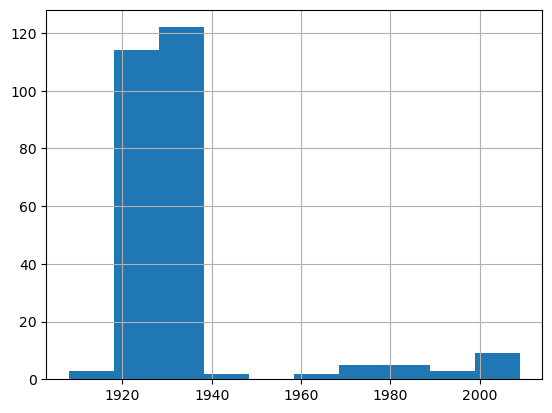

In [62]:
df_stable["year"].hist()

<Axes: >

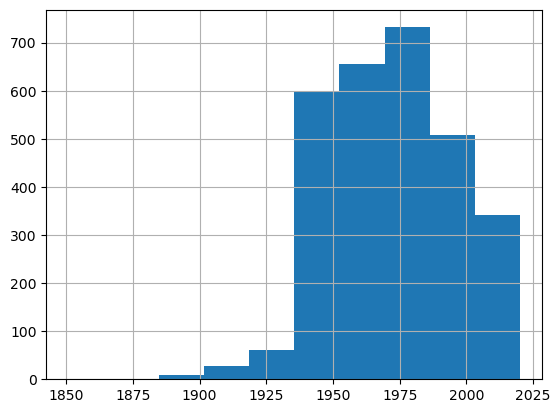

In [63]:
df_unstable["year"].hist()

Text(0, 0.5, 'Number of discovered stable isotopes')

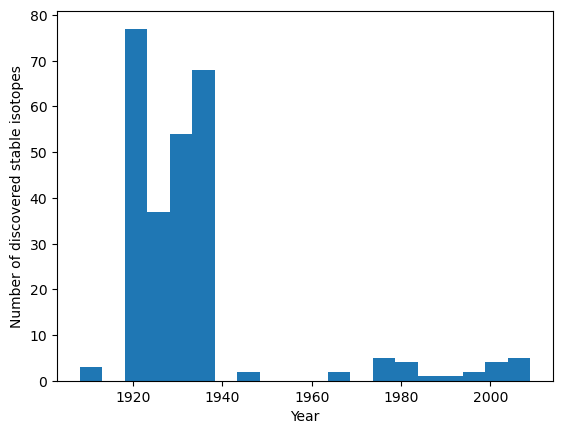

In [64]:
# same plot with matplotlib

plt.hist(df_stable["year"], bins=20)
plt.xlabel("Year")
plt.ylabel ("Number of discovered stable isotopes")

### Scatter plot

<Axes: xlabel='A', ylabel='R_fm'>

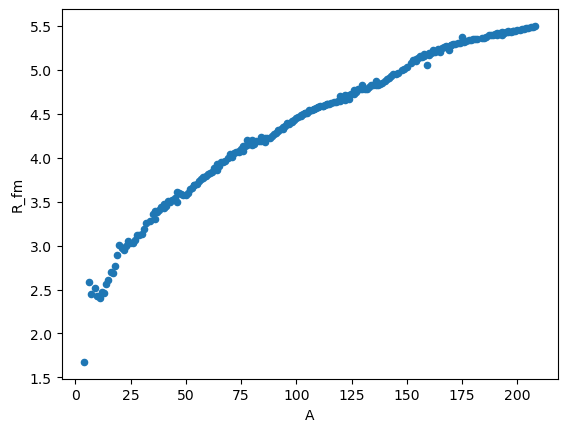

In [65]:
df_stable[["R_fm", "A"]].plot.scatter("A", "R_fm")

<Axes: xlabel='A', ylabel='R_fm'>

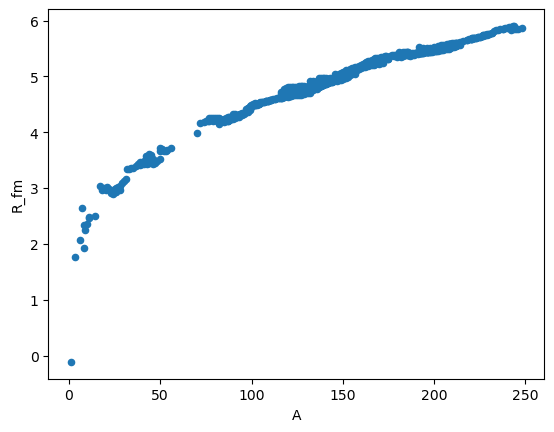

In [66]:
df_unstable[["R_fm", "A"]].plot.scatter("A", "R_fm")
#plt.plot(df_unstable["A"],1.2*df_unstable['A']**(1/3))
#plt.xlim([0,50])

### Bar plot

<Axes: xlabel='N'>

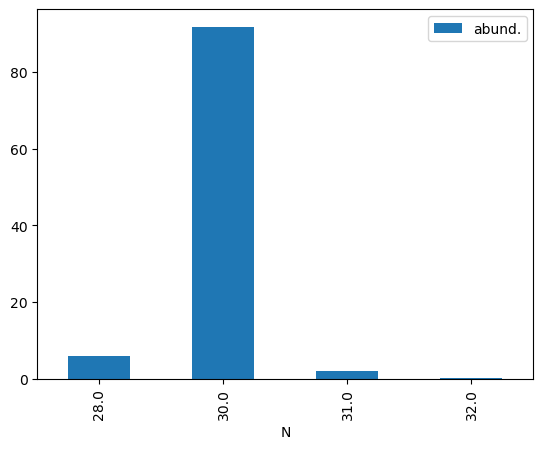

In [67]:
df_stable[df_stable['symbol']=='Fe']

df_stable[df_stable['symbol']=='Fe'].plot.bar("N","abund.")

### Example 1: finding the most long-living Radium isotope

In [68]:
df_unstable.describe()

,Z,N,R_fm,abund.,tau,A,year
count,2963.000000,2963.000000,664.000000,44.000000,2.963000e+03,2958.000000,2932.000000
mean,58.340871,82.659804,4.842370,19.413966,8.269819e+28,141.011578,1972.241132
std,27.245240,42.206972,0.752936,31.792083,4.464067e+30,68.909771,23.267103
min,0.000000,1.000000,-0.114900,0.005400,8.608259e-23,1.008665,1851.000000
25%,37.000000,49.000000,4.508175,0.196750,1.665000e-01,86.928319,1954.000000
50%,59.000000,82.000000,4.967600,4.991500,1.220000e+01,140.913979,1971.000000
75%,80.500000,114.000000,5.410050,17.199500,1.338000e+03,193.970995,1990.000000
max,118.000000,177.000000,5.904800,100.000000,2.429883e+32,294.213979,2020.000000


In [69]:
df_radium = df_unstable[df_unstable['symbol']=='Ra']

In [70]:
df_radium.loc[df_radium['tau'].idxmax()]

Z                          88.0
N                         138.0
symbol                       Ra
R_fm                     5.7211
abund.                      NaN
tau          50491081559.347198
A                    226.025408
year                     1898.0
stability                   0.0
Name: 2781, dtype: object

### Example 2: Finding only unstable elements

In [71]:
df_unstable[~df_unstable['symbol'].isin(df_stable['symbol'])]

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
0,0.0,1.0,n,-0.1149,NaN,6.139000e+02,1.008665,NaN,0.0
1,0.0,4.0,n,NaN,NaN,1.754760e-22,NaN,NaN,0.0
1016,43.0,42.0,Tc,NaN,NaN,1.000000e-07,84.950778,NaN,0.0
1017,43.0,43.0,Tc,NaN,NaN,5.500000e-02,85.944637,1992.0,0.0
1018,43.0,44.0,Tc,NaN,NaN,2.200000e+00,86.938067,1991.0,0.0
...,...,...,...,...,...,...,...,...,...
3224,116.0,176.0,Lv,NaN,NaN,1.280000e-02,292.201969,2004.0,0.0
3225,116.0,177.0,Lv,NaN,NaN,9.500000e-02,293.204583,2004.0,0.0
3226,117.0,176.0,Ts,NaN,NaN,2.100000e-02,293.208727,2010.0,0.0
3227,117.0,177.0,Ts,NaN,NaN,5.100000e-02,294.210840,2010.0,0.0


### Example 3: ten largest nuclei 

In [72]:
df_unstable.sort_values(by='R_fm',na_position='first')

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
1,0.0,4.0,n,NaN,NaN,1.754760e-22,NaN,NaN,0.0
4,1.0,4.0,H,NaN,NaN,8.608259e-23,5.035311,1987.0,0.0
5,1.0,5.0,H,NaN,NaN,2.943469e-22,6.044955,1984.0,0.0
6,1.0,6.0,H,NaN,NaN,5.069308e-21,7.052749,2003.0,0.0
8,2.0,3.0,He,NaN,NaN,7.040705e-22,5.012057,1937.0,0.0
...,...,...,...,...,...,...,...,...,...
2948,94.0,147.0,Pu,5.8748,NaN,4.521792e+08,241.056850,1949.0,0.0
2949,94.0,148.0,Pu,5.8823,NaN,1.177073e+13,242.058741,1950.0,0.0
2967,95.0,146.0,Am,5.8928,NaN,1.365153e+10,241.056827,1949.0,0.0
2951,94.0,150.0,Pu,5.8948,NaN,2.565578e+15,244.064204,1954.0,0.0


In [73]:
df_unstable.sort_values(by='R_fm',na_position='first').iloc[-10:]

,Z,N,symbol,R_fm,abund.,tau,A,year,stability
2985,96.0,150.0,Cm,5.8562,NaN,1.485069e+11,246.067222,1954.0,0.0
2906,92.0,146.0,U,5.8571,99.2742,1.409963e+17,238.050787,1896.0,0.0
2946,94.0,145.0,Pu,5.8601,NaN,7.608375e+11,239.052162,1946.0,0.0
2987,96.0,152.0,Cm,5.8687,NaN,1.098181e+13,248.072349,1956.0,0.0
2947,94.0,146.0,Pu,5.8701,NaN,2.070450e+11,240.053812,1949.0,0.0
2948,94.0,147.0,Pu,5.8748,NaN,4.521792e+08,241.056850,1949.0,0.0
2949,94.0,148.0,Pu,5.8823,NaN,1.177073e+13,242.058741,1950.0,0.0
2967,95.0,146.0,Am,5.8928,NaN,1.365153e+10,241.056827,1949.0,0.0
2951,94.0,150.0,Pu,5.8948,NaN,2.565578e+15,244.064204,1954.0,0.0
2969,95.0,148.0,Am,5.9048,NaN,2.323852e+11,243.061380,1950.0,0.0


### Example 4: Dealing with missing data

In [ ]:
df_unstable.dropna()

In [ ]:
df_unstable.isna()

# Additional resources

It is worth having a look at "10 minutes to pandas" in the documentation: https://pandas.pydata.org/docs/user_guide/10min.html